In [2]:
import numpy as np
import matplotlib.pyplot as plt
import particles

# **MoG Example**

Text(0.5, 1.0, 'MoG sample')

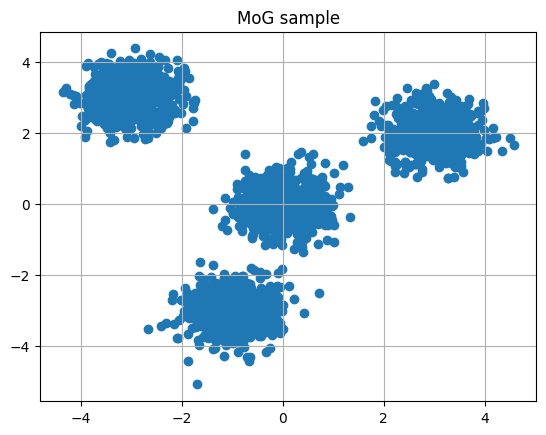

In [11]:
class MoG:
    def __init__(self, means, stds, weights):
        self.means = means
        self.stds  = stds
        self.weights  = weights

    def sample_gmm(self, n_samples):
        samples = []
        for _ in range(n_samples):
            k = np.random.choice(len(self.weights), p=self.weights)
            x = np.random.multivariate_normal(self.means[k], self.stds[k])
            samples.append(x)

        return np.array(samples)



means = [[0,0], [-3,3], [-1,-3], [3,2]]
stds = [1/5*np.eye(2), 1/5*np.eye(2), 1/5*np.eye(2), 1/5*np.eye(2)]
weights = [0.25, 0.25, 0.25, 0.25]


mog = MoG(means, stds, weights)
sample = mog.sample_gmm(3000)

plt.scatter(sample[:,0], sample[:, 1])
plt.grid()
plt.title("MoG sample")

In [77]:
class SimpleDDM:
    def __init__(self, betas):
        self.betas = betas

    def forward(self,x0):
        trajectory = [x0]
        m = x0.shape[0]
        next_x = x0
        for beta in self.betas:
            next_x = np.sqrt(1-beta)*next_x + np.sqrt(beta)*np.random.normal(size=m)
            trajectory.append(next_x)
        return trajectory 
    
    def backward(self, xT):
        x = xT
        trajectory = [x]
        for beta in reversed(self.betas):
            m = x.shape[0]
            mean = x / np.sqrt(1 - beta)
            x = mean + np.sqrt(beta) * np.random.normal(size=m)
            trajectory.append(x)
        trajectory = trajectory[::-1] 
        return trajectory

### **Forward Pass** 


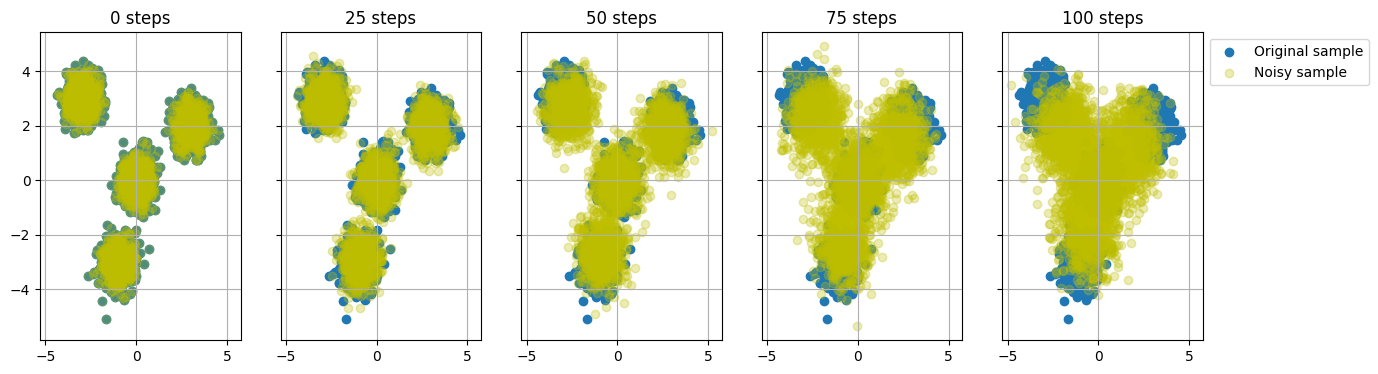

In [124]:
T = 100
beta_start, beta_end = 1e-4, 0.02
betas_try = np.linspace(beta_start, beta_end, T)
DDM = SimpleDDM(betas_try)

n1,n2 = sample.shape
X0 = np.squeeze(sample.reshape(-1,1))

forward_pass = DDM.forward(X0)

fig, ax = plt.subplots(1,5, figsize = (15,4),  sharex=True, sharey=True)
steps_to_print = [0, 25, 50, 75, 100]
for ind, step in enumerate(steps_to_print):

    image = forward_pass[step].reshape(n1, n2)
    ax[ind].scatter(sample[:,0], sample[:,1], label ="Original sample")
    ax[ind].scatter(image[:,0], image[:,1], c = 'y', alpha = 0.3, label = "Noisy sample")
    ax[ind].grid()
    ax[ind].set_title(f"{step} steps")
   
plt.legend(bbox_to_anchor = (1,1))



### **Backward Pass** 

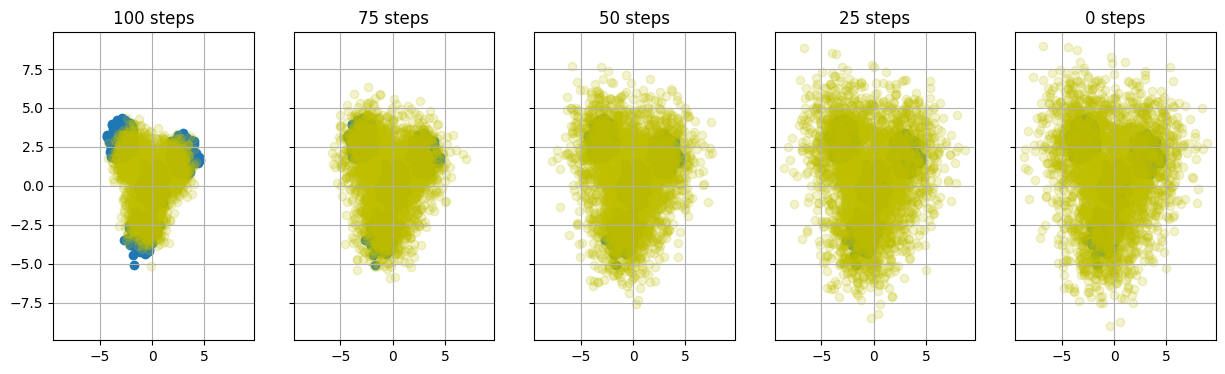

In [123]:
blured_sample = forward_pass[-1]
backward_pass = DDM.backward(blured_sample)

fig, ax = plt.subplots(1,5, figsize = (15,4), sharex=True, sharey=True)

steps_to_print = [100, 75, 50, 25 ,0] 
for ind, step in enumerate(steps_to_print):
    image = backward_pass[step].reshape(n1,n2)
    ax[ind].scatter(sample[:,0], sample[:,1], label ="Original sample")
    ax[ind].scatter(image[:,0], image[:,1], c = 'y', alpha = 0.2, label = "Noisy sample")
    ax[ind].grid()
    ax[ind].set_title(f"{step} steps")
